In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
%ls

drive/  sample_data/


In [4]:
%cd /content/drive/My Drive/CV_tests/

/content/drive/My Drive/CV_tests


In [5]:
%ls

Assignment_2.ipynb       movie-wall-e-ad1.jpg
beach.jpg                output.png
cat.jpg                  peppers.pgm
catnew.bmp               peppers.png
chessboard.jpg           Railroad-Tracks-Perspective.jpg
circles.jpg              Report.gdoc
Class_Jan_31_2022.ipynb  rotated_image.png
CV_ImageFormation.ipynb  small_cat.jpg
dog.bmp                  test11.jpg
lenna.pgm                test1.jpg
lenna.png


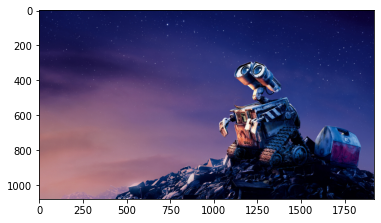

In [6]:
# importing matplotlib modules
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
  
# Read Images
img = mpimg.imread('/content/drive/My Drive/CV_tests/movie-wall-e-ad1.jpg')
  
# Output Images
plt.imshow(img)

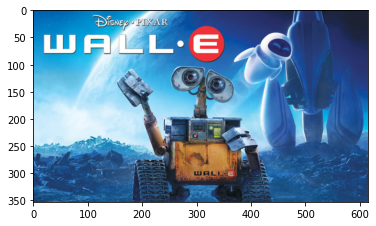

In [ ]:
# Read Images
img = mpimg.imread('/content/drive/My Drive/CV_tests/test1.jpg')
  
# Output Images
plt.imshow(img)




# **1. Rotation**

Enter the angle :- 45


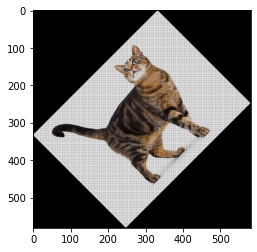

In [67]:

import numpy as np
from PIL import Image
import math


image = np.array(Image.open('/content/drive/My Drive/CV_tests/cat.jpg'))             # Load the image
angle=int(input("Enter the angle :- "))                # Ask the user to enter the angle of rotation
def rotation(image,angle):
  # Define the most occuring variables
  
  angle=math.radians(angle)                               #converting degrees to radians
  cosine=math.cos(angle)
  sine=math.sin(angle)
  height=image.shape[0]                                   #define the height of the image
  width=image.shape[1]                                    #define the width of the image

  # Define the height and width of the new image that is to be formed
  new_height  = round(abs(image.shape[0]*cosine)+abs(image.shape[1]*sine))+1
  new_width  = round(abs(image.shape[1]*cosine)+abs(image.shape[0]*sine))+1

  # define another image variable of dimensions of new_height and new _column filled with zeros
  output=np.zeros((new_height,new_width,image.shape[2]))
  
  # Find the centre of the image about which we have to rotate the image
  original_centre_height   = round(((image.shape[0]+1)/2)-1)    #with respect to the original image
  original_centre_width    = round(((image.shape[1]+1)/2)-1)    #with respect to the original image

  # Find the centre of the new image that will be obtained
  new_centre_height= round(((new_height+1)/2)-1)        #with respect to the new image
  new_centre_width= round(((new_width+1)/2)-1)          #with respect to the new image

  for i in range(height):
      for j in range(width):
          #co-ordinates of pixel with respect to the centre of original image
          y=image.shape[0]-1-i-original_centre_height                   
          x=image.shape[1]-1-j-original_centre_width                      

          #co-ordinate of pixel with respect to the rotated image
          new_y=round(-x*sine+y*cosine)
          new_x=round(x*cosine+y*sine)

          '''since image will be rotated the centre will change too, 
            so to adust to that we will need to change new_x and new_y with respect to the new centre'''
          new_y=new_centre_height-new_y
          new_x=new_centre_width-new_x

          # adding if check to prevent any errors in the processing
          if 0 <= new_x < new_width and 0 <= new_y < new_height and new_x>=0 and new_y>=0:
              output[new_y,new_x,:]=image[i,j,:]                          #writing the pixels to the new destination in the output image
  return(output)
image_out = rotation(image,angle)  
pil_img=Image.fromarray((image_out).astype(np.uint8))                       # converting array to image
pil_img.save("/content/drive/My Drive/CV_tests/rotated_image.png")  


# Output Images

plt.imshow(pil_img)

The picture quality is not good as compared to Cv2


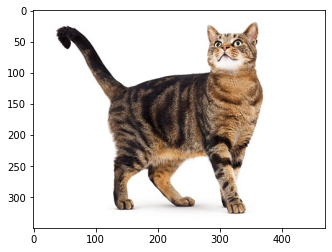

In [ ]:
image = np.array(Image.open('/content/drive/My Drive/CV_tests/cat.jpg'))
image = image.astype(dtype='int64')

plt.imshow(image)


#**2. Cropping**

Text(0.5, 1.0, 'Cropped')

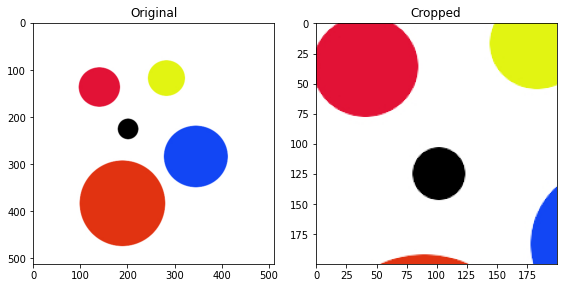

In [107]:
from PIL import Image, ImageDraw

image = Image.open("/content/drive/My Drive/CV_tests/circles.jpg")
fig, axes = plt.subplots(1, 2, figsize = (8, 8))
axes = axes.ravel()

input_pixels = image.load()
start = (100, 100)
end = (300, 300)
cropimage = Image.new("RGB", (end[0] - start[0], end[1] - start[1])) #Create a dimension of cropped output image in RGB
draw = ImageDraw.Draw(cropimage) 
for x in range(cropimage.width):  #fetch x-cordinate value using .width command
    for y in range(cropimage.height): #fetch y-cordinate value using .height command
        xp, yp = x + start[0], y + start[1]
        draw.point((x, y), input_pixels[xp, yp])

fig.tight_layout()
axes[0].imshow(image,cmap = plt.cm.gray)
axes[0].set_title("Original")
axes[1].imshow(cropimage, cmap = plt.cm.gray)
axes[1].set_title("Cropped")

# **3. Resize**

Text(0.5, 1.0, 'Resized')

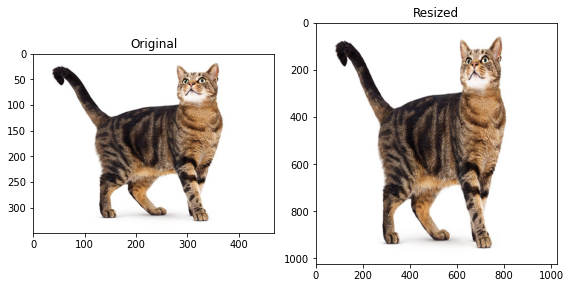

In [120]:
from PIL import Image, ImageDraw
from math import floor
import numpy as np

fig, axes = plt.subplots(1, 2, figsize = (8, 8))
axes = axes.ravel()

image = Image.open("/content/drive/My Drive/CV_tests/cat.jpg")
input_pixels = image.load()
scale_size = (1024, 1024)
scaleimage = Image.new("RGB", scale_size)
draw = ImageDraw.Draw(scaleimage)
xscale_factor = image.width / scaleimage.width
yscale_factor = image.height / scaleimage.height
for x in range(scaleimage.width):
    for y in range(scaleimage.height):
        xp, yp = floor(x * xscale_factor), floor(y *yscale_factor) #yscale_factor=350/1024,xscale_factor=470/1024
        draw.point((x, y), input_pixels[xp, yp])
fig.tight_layout()
axes[0].imshow(image,cmap = plt.cm.gray)
axes[0].set_title("Original")
axes[1].imshow(scaleimage, cmap = plt.cm.gray)
axes[1].set_title("Resized")


In [125]:
image.size
xscale_factor,yscale_factor

(0.458984375, 0.341796875)

# **4. Flipping**


Text(0.5, 1.0, 'Horizontal and Vertical Flip')

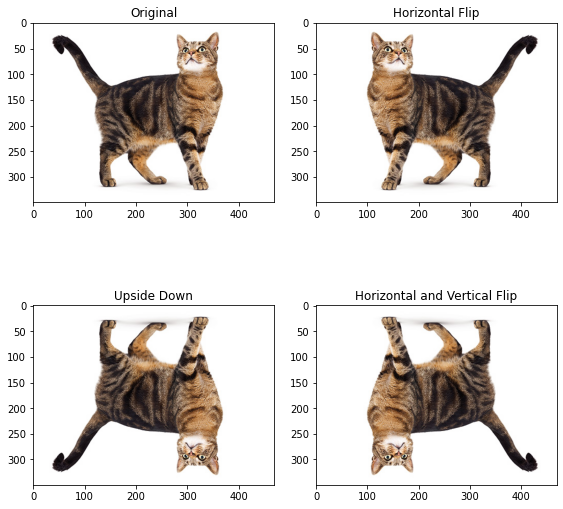

In [126]:
import math
image = Image.open('/content/drive/My Drive/CV_tests/cat.jpg')
image.size
fig, axes = plt.subplots(2, 2, figsize = (8, 8))
axes = axes.ravel()

height=image.size[0]
width = image.size[1]
image_arr=np.array(image)
B=image_arr[:,::-1] #array reversed horizontally
C=image_arr[::-1] #array reversed vertically
D=image_arr[::-1,::-1,] #array reversed both horizontal and vertical
flip_imgB = Image.fromarray(B) 
flip_imgC = Image.fromarray(C)
flip_imgD = Image.fromarray(D)

fig.tight_layout()
axes[0].imshow(image,cmap = plt.cm.gray)
axes[0].set_title("Original")
axes[1].imshow(flip_imgB, cmap = plt.cm.gray)
axes[1].set_title("Horizontal Flip")
axes[2].imshow(flip_imgC, cmap = plt.cm.gray)
axes[2].set_title("Upside Down")
axes[3].imshow(flip_imgD, cmap = plt.cm.gray)
axes[3].set_title("Horizontal and Vertical Flip")


## **5. Translation**

(233, 350, 3)


Text(0.5, 1.0, 'Translated')

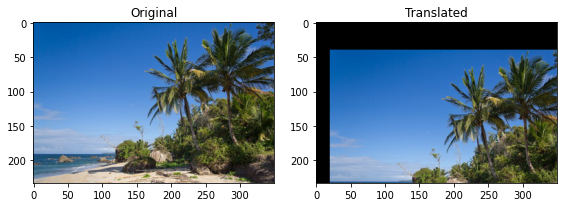

In [144]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

image = np.asarray(Image.open('/content/drive/My Drive/CV_tests/beach.jpg'))
print(image.shape)
fig, axes = plt.subplots(1, 2, figsize = (8, 8))
axes = axes.ravel()

def translation_img(img,distance,shapeofimage):
    h= img.shape[0]
    w = img.shape[1]
    x_distance,y_distance = distance[0] ,distance[1]
    matrix = np.array([[1,0,x_distance],[0,1,y_distance]])
    out_img = np.zeros(shapeofimage,dtype='u1')
    for i in range(h):
        for j in range(w):
            origin_x,origin_y = j,i
            origin_xy = np.array([origin_x,origin_y,1])
            new_xy = np.dot(matrix,origin_xy)
            new_x,new_y = new_xy[0],new_xy[1]
            if 0<new_x < w and 0<new_y < h:
                out_img[new_y,new_x]  = img[i,j]
    return out_img

offset = (20,40)
translate_image = translation_img(image,offset,image.shape)
translate_image = Image.fromarray(np.uint8(translate_image))

fig.tight_layout()
axes[0].imshow(image,cmap = plt.cm.gray)
axes[0].set_title("Original")
axes[1].imshow(translate_image, cmap = plt.cm.gray)
axes[1].set_title("Translated")

# **6. Padding**

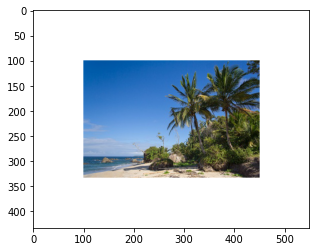

In [145]:
R, G, B = image[:, :, 0], image[:, :, 1], image[:, :, 2]
r_cons, g_cons, b_cons = [255, 255, 255]
bd=100
rb = np.pad(array=R, pad_width=bd, mode='constant', constant_values=r_cons)
gb = np.pad(array=G, pad_width=bd, mode='constant', constant_values=g_cons)
bb = np.pad(array=B, pad_width=bd, mode='constant', constant_values=b_cons)
image_b = np.dstack(tup=(rb, gb, bb))
plt.imshow(image_b)

# **7. Splitting Colors**


Text(0.5, 1.0, 'blue')

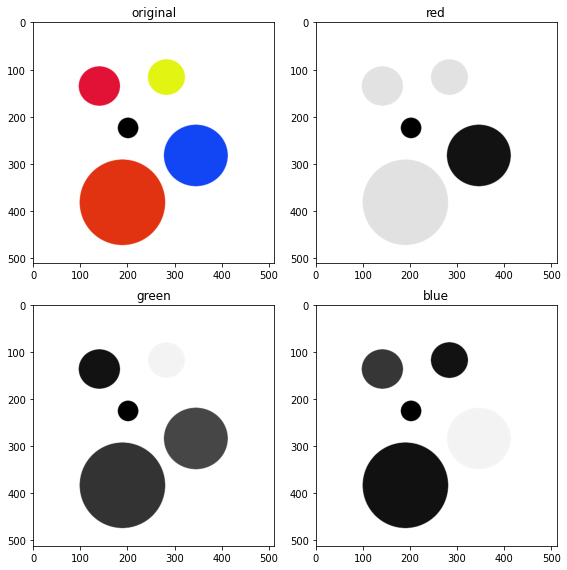

In [151]:
image = np.asarray(Image.open('/content/drive/My Drive/CV_tests/circles.jpg'))
R, G, B = image[:, :,0 ], image[:, :, 1], image[:, :, 2]
fig, axes = plt.subplots(2, 2, figsize = (8, 8))
axes = axes.ravel()

fig.tight_layout()
axes[0].imshow(image)
axes[0].set_title("original")
axes[1].imshow(R, cmap = plt.cm.gray)
axes[1].set_title("red")
axes[2].imshow(G, cmap = plt.cm.gray)
axes[2].set_title("green")
axes[3].imshow(B, cmap = plt.cm.gray)
axes[3].set_title("blue")

#Reference
1.   https://stackoverflow.com/questions/509211/understanding-slice-notation
2.   https://www.codingame.com/playgrounds/2524/basic-image-manipulation/transformation
3.   https://blockgeni.com/rotating-image-by-any-angle-using-numpy/
4.  https://github.com/prayat-pu/Computer_vision
5.  https://numpy.org/doc/stable/reference/generated/numpy.flip.html









